In [20]:
'''---------------------------------------------IMPORT PACKAGES -----------------------------------------------------'''
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['text.usetex'] = True
import shutil
from windrose import WindroseAxes
import matplotlib.cm as cm

'''----------------------------------------------SET PATHS ---------------------------------------------------- '''
data_path = "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Data/IOP1/SWOPC/" # Data Path
files = 'LEMSBC01.CSV' # Data file name

#LocalsaveFig_path = "../gen/" #Local Save Dir
#Finalsave_path = "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Quick_Looks/LEMS3/7_7_2021/"
Figure_Names = ['Batt_Press_Solar', 'Soil_T_Moist', 'Air_Surface_T_RH','Sonic','Raw_windrose']



In [21]:
'''--------------------------------------------LOAD/PREPARE DATA ----------------------------------------------------'''
df = pd.read_csv(data_path + files) #read in data
df_time = pd.DataFrame(columns=['time']) # creates the blank dataframe with column called time
df_time.time=pd.to_datetime(df['Year'].astype(str)+"-"+df['Month'].astype(str)+"-"+df['Date'].astype(str)+" "+df['Hour'].astype(str)+":"+df['Minute'].astype(str)+":"+df['Second'].astype(str),format='%Y-%m-%d %H:%M:%S') #convert the time to pandas time

# delete the old time columns 
del df['Year']
del df['Month']
del df['Date']
del df['Hour']
del df['Minute']
del df['Second']

df = pd.concat([df_time.time, df ], axis=1) # Merge the time series with rest of data

#Set time index and average every 30 mins
df = df.set_index('time')
df_raw = df #set aside raw data just in case
df = df.resample(rule = '1Min').mean()
print(df.index[-1])

2021-08-04 18:33:00


Make Quick Looks of Raw Data

In [22]:
'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 12}) #Set font size

In [ ]:
'''---------------------------------------------- Figure 1 ------------------------------------------------------'''
#Figure 1 ~ Battery, Pressure, Pressure, and Pressue Temp
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(10, 6))
#fig.suptitle('Aligning x-axis using sharex')
ax1.plot(df.index, df['Bat_Lvl'])
ax1.set(ylabel = 'Batt. Lvl. [V]')
ax1.grid(b=bool, which='major', axis='both')
ax1.autoscale(enable=True, axis='x', tight=True)

ax2.plot(df.index, df['Pressure'])
ax2.set(ylabel = 'Pressure [Pa]')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)

ax3.plot(df.index, df['BMP_Amb'])
ax3.set(ylabel = r'Pressure T [$^{\circ}$C]')
ax3.grid(b=bool, which='major', axis='both')
ax3.autoscale(enable=True, axis='x', tight=True)

ax4.plot(df.index, df['Sunlight'])
ax4.set(ylabel = r'$SW_i$ [W m$^{-2}$]')
ax4.grid(b=bool, which='major', axis='both')
ax4.autoscale(enable=True, axis='x', tight=True)


plt.minorticks_on()
#save figure
plt.savefig('../gen/'+Figure_Names[0] +'.png', bbox_inches='tight')

In [ ]:
'''---------------------------------------------- Figure 2 ------------------------------------------------------'''
#Figure 2 ~ Soil Temp and Moist
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(10, 6))
#fig.suptitle('Aligning x-axis using sharex')

ax1.plot(df.index, df['Upper_Soil_Temp'])
ax1.set(ylabel = r'Up Soil T [$^{\circ}$C]')
ax1.grid(b=bool, which='major', axis='both')
#ax1.autoscale(enable=True, axis='x', tight=True)

ax2.plot(df.index, df['Upper_Soil_Mois'])
ax2.set(ylabel = 'Up Moist. []')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)

ax3.plot(df.index, df['Lower_Soil_Temp'])
ax3.set(ylabel = r'Low Soil T [$^{\circ}$C]')
ax3.grid(b=bool, which='major', axis='both')
#ax3.autoscale(enable=True, axis='x', tight=True)

ax4.plot(df.index, df['Lower_Soil_Mois'])
ax4.set(ylabel = 'Low Moist. []')
ax4.grid(b=bool, which='major', axis='both')
ax4.autoscale(enable=True, axis='x', tight=True)


plt.minorticks_on()
#save figure
plt.savefig('../gen/' + Figure_Names[1] +'.png', bbox_inches='tight')

In [ ]:
'''---------------------------------------------- Figure 3 ------------------------------------------------------'''
#Figure 3 ~ Air Temp and RH
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(10, 6))
#fig.suptitle('Aligning x-axis using sharex')

ax1.plot(df.index, df['SHT_Amb_C'])
ax1.set(ylabel = r'Air T [$^{\circ}$C]')
ax1.grid(b=bool, which='major', axis='both')
ax1.autoscale(enable=True, axis='x', tight=True)

ax2.plot(df.index, df['SHT_Hum_Pct'])
ax2.set(ylabel = r'Air RH [\%]')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)

ax3.plot(df.index, df['MLX_IR_C'])
ax3.set(ylabel = r'MLX $T_s$ [$^{\circ}$C]')
ax3.grid(b=bool, which='major', axis='both')
ax3.autoscale(enable=True, axis='x', tight=True)

ax4.plot(df.index, df['MLX_Amb_C'])
ax4.set(ylabel = r'MLX $T_A$ [$^{\circ}$C]')
ax4.grid(b=bool, which='major', axis='both')
ax4.autoscale(enable=True, axis='x', tight=True)


plt.minorticks_on()
#save figure
plt.savefig('../gen/'+Figure_Names[2] +'.png', bbox_inches='tight')

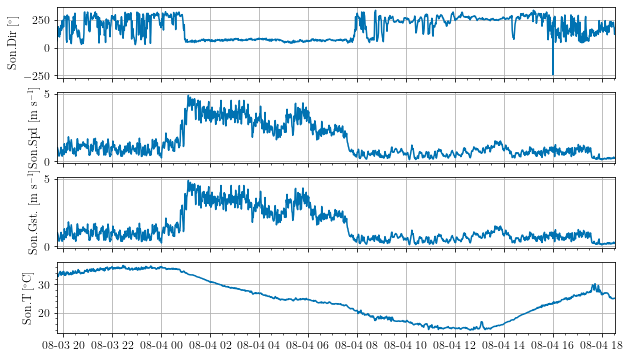

In [23]:
'''---------------------------------------------- Figure 4 ------------------------------------------------------'''
#Figure 4 ~ Sonic Values
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(10, 6))
#fig.suptitle('Aligning x-axis using sharex')

ax1.plot(df.index, df['Sonic_Dir'])
ax1.set(ylabel = r'Son.Dir [$^{\circ}$]')
ax1.grid(b=bool, which='major', axis='both')
ax1.autoscale(enable=True, axis='x', tight=True)

ax2.plot(df.Sonic_Spd[df.Sonic_Spd > 0 ])
ax2.set(ylabel = r'Son.Spd [m s$^{-1}$]')
ax2.grid(b=bool, which='major', axis='both')
ax2.autoscale(enable=True, axis='x', tight=True)

ax3.plot(df.index, df['Sonic_Gst'])
ax3.set(ylabel = r'Son.Gst. [m s$^{-1}$]')
ax3.grid(b=bool, which='major', axis='both')
ax3.autoscale(enable=True, axis='x', tight=True)

ax4.plot(df.index, df['Sonic_Tmp'])
ax4.set(ylabel = r'Son.T [$^{\circ}$C]')
ax4.grid(b=bool, which='major', axis='both')
ax4.autoscale(enable=True, axis='x', tight=True)

plt.minorticks_on()
#save figure
plt.savefig('../gen/'+Figure_Names[3] +'.png', bbox_inches='tight')

In [17]:
#Calculate the proper average wind direction
V_east = mean(df_raw.Sonic_Spd * sin(df_raw.Sonic_Dir * pi/180))
V_north = mean(df_raw.Sonic_Spd * cos(df_raw.Sonic_Dir * pi/180))

mean_WD = arctan2(V_east, V_north) * 180/pi
mean_WD = (360 + mean_WD) % 360

NameError: name 'mean' is not defined

"ax = WindroseAxes.from_ax()\nax.bar(df['Sonic_Dir'], df['Sonic_Spd'], normed=True, opening=0.8, edgecolor='white', mean_values = 'True')\nax.set_legend()"

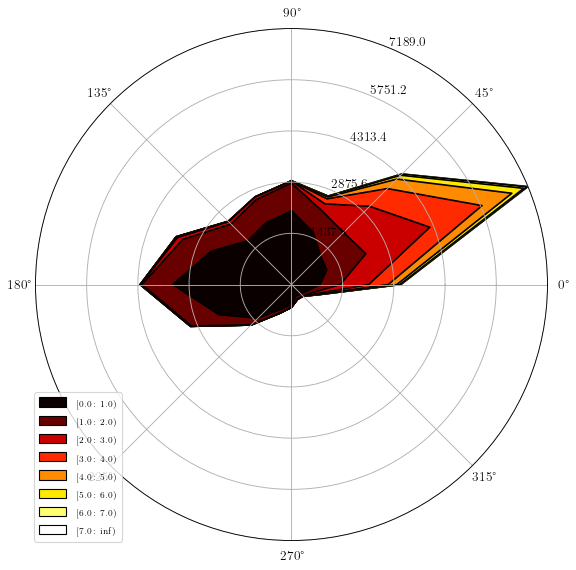

In [24]:
'''---------------------------------------------- Figure 5 ------------------------------------------------------'''
#Wind rose figure
# Create wind speed and direction variables
#ws = np.random.random(500) * 6
#wd = np.random.random(500) * 360

ax = WindroseAxes.from_ax()
ax.contourf(df_raw.Sonic_Dir,df_raw.Sonic_Spd, bins=np.arange(0, 8, 1), cmap=cm.hot)
ax.contour(df_raw.Sonic_Dir,df_raw.Sonic_Spd, bins=np.arange(0, 8, 1), colors='black')
ax.set_legend()
plt.savefig('../gen/'+Figure_Names[4] +'.png', bbox_inches='tight')
'''ax = WindroseAxes.from_ax()
ax.bar(df['Sonic_Dir'], df['Sonic_Spd'], normed=True, opening=0.8, edgecolor='white', mean_values = 'True')
ax.set_legend()'''




Move all the figures to a final destination ~ Still not working

In [292]:
'''for ii in Figure_Names:
    shutil.move("../gen/"+Figure_Names[ii]+".png", "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Quick_Looks/LEMS2/7_7_2021/" + Figure_Names[ii] + ".png")'''

'for ii in Figure_Names:\n    shutil.move("../gen/"+Figure_Names[ii]+".png", "C:/Users/tjmor/OneDrive/Research/Projects/Oregon_Carrot/Quick_Looks/LEMS2/7_7_2021/" + Figure_Names[ii] + ".png")'